# London Capstane Project
## By Sharif Alkhass

### Introduction:

The following project will be looking into helping someone trying to open a new establishment that sells food in and around of London. For this we will be looking into specific information relating to the different boroughs of London, this includes the types of restaurants, cafes and fast food establishments found in each borough, as well as how well new businesses did in the past, which should give us an idea of how well newly founded business preform in each area.

### Data:

- First we obtain data regarding London boroughs https://en.wikipedia.org/wiki/London_boroughs
- Business preformance in each borough
- Use coordinates and foursquare to find our data relating to restaurants
In this project we have used business-demographics from an online source https://data.london.gov.uk/dataset/business-demographics-and-survival-rates-borough.

### Methodology:

The following will show the Methodology as well as the code used for our research. To start with we will be installing all the required packages and importing all the modules for our research, and we will add to the section if we require more packages not defines initially.
Following this we will be using Forsquare to obtain data regarding each borough of London. To do this we scraped a webpage to obtain information regarding all the boroughs of London, the information from this is then used to find the coordinates for each borough. 
Once we have our coordinates we use Foursquare to find the local establishments witihin a specific radius. From here we organise our data and only display the top 10 for each borough. This will give us an idea of what which establishment performs best in which borough. 
After this we will use data regarding the performance of new business in each borough. This should help any clients looking at opening a new business in a specific borough as it will give them an idea of how well excepted new businesses are in the area they are looking at.

***
***
***
#### Here we are installing all of the required packages for the project

In [1]:
!pip install BeautifulSoup4
!pip install request
!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
!pip install folium

In [3]:
!pip install lxml

In [198]:

import matplotlib as mlt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import lxml

import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.stats import *

import sklearn
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import folium
from IPython.display import display

#### Here we are collecting our data on the different Boroughs in London :

For this we will need to use beautifulsoup to obtain the reuired information off the table in the link provided. Then we append it to a dataframe using pandas.

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/London_boroughs').text

soup = BeautifulSoup(source,'lxml')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>London boroughs - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XmK9MwpAICwAABqwuGEAAABC","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"London_boroughs","wgTitle":"London boroughs","wgCurRevisionId":944119525,"wgRevisionId":944119525,"wgArticleId":52613,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Articles with 

In [3]:
table=soup.find("table",{"class":"wikitable sortable"})


In [4]:
table.prettify

<bound method Tag.prettify of <table class="wikitable sortable" style="font-size:85%;">
<tbody><tr>
<th>London borough
</th>
<th>Designation
</th>
<th class="unsortable" colspan="5">Former areas
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Camden" title="London Borough of Camden">Camden</a>
</td>
<td>Inner
</td>
<td><a href="/wiki/Metropolitan_Borough_of_Hampstead" title="Metropolitan Borough of Hampstead">Hampstead</a> (11a)</td>
<td><a href="/wiki/Metropolitan_Borough_of_St_Pancras" title="Metropolitan Borough of St Pancras">St Pancras</a> (11b)</td>
<td><a href="/wiki/Metropolitan_Borough_of_Holborn" title="Metropolitan Borough of Holborn">Holborn</a> (11c)</td>
<td></td>
<td>
</td></tr>
<tr>
<td><a href="/wiki/Royal_Borough_of_Greenwich" title="Royal Borough of Greenwich">Greenwich</a>
</td>
<td>Inner
</td>
<td><a href="/wiki/Metropolitan_Borough_of_Greenwich" title="Metropolitan Borough of Greenwich">Greenwich</a> (22a)</td>
<td><a href="/wiki/Metropolitan_Borough_of_Woolw

In [5]:
rows=table.find_all('tr')

In [6]:
our_columns =[r.text.replace('\n','') for r in rows[0].find_all('th')]
df = pd.DataFrame(columns=our_columns)

for i in range(1,len(rows)):
    table_ds=rows[i].find_all('td')
    values=[table_ds[0].text.replace('\n',''),table_ds[1].text.replace('\n',''),table_ds[2].text.replace('\n','')]
    df=df.append(pd.Series(values,index=our_columns),ignore_index=True)

In [7]:
df


,London borough,Designation,Former areas
0,Camden,Inner,Hampstead (11a)
1,Greenwich,Inner,Greenwich (22a)
2,Hackney,Inner,Hackney (9a)
3,Hammersmith[notes 2],Inner,Hammersmith (4a)
4,Islington,Inner,Islington (10a)
5,Kensington and Chelsea,Inner,Kensington (3a)
6,Lambeth,Inner,Lambeth (6a)
7,Lewisham,Inner,Lewisham (21a)
8,Southwark,Inner,Bermondsey (7b)
9,Tower Hamlets,Inner,Bethnal Green (8a)


Fixing up the data in London borough column to get rid of 'notes' as shown in the example above:


In [8]:
for d in df['London borough']:
    if "[notes " in d:
        new_d=d[0:d.index("[notes ")]  # take the string up to index of where '[notes' starts
        ind_r_d =df.loc[df['London borough']==d].index  #finds the index row for the value where it found d
        df.iloc[ind_r_d,0]=new_d  # replaces the values in dataframe with new corrected ones
        
        
df.head()

,London borough,Designation,Former areas
0,Camden,Inner,Hampstead (11a)
1,Greenwich,Inner,Greenwich (22a)
2,Hackney,Inner,Hackney (9a)
3,Hammersmith,Inner,Hammersmith (4a)
4,Islington,Inner,Islington (10a)


In [9]:
#### Now the latitude and longitude for each location is found using Nominatim:

In [10]:
geolocator =Nominatim(user_agent="My_app",timeout=3)
latitude=[]
longitude=[]
postcodes=[]
for row in df['London borough']:
    g=geolocator.geocode('{}, London, United Kingdom'.format(row),timeout=None)
    latitude.append(g.latitude)  #Create list of latitude and longitude
    longitude.append(g.longitude)
df['Latitude']=np.array(latitude) # creating the columns for the dataframe
df['Longitude']=np.array(longitude)

C:\Users\Sharif\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  


In [11]:
df.drop(['Former areas','Designation'],axis=1,inplace=True) # Dropping unwanted columns
df.head()

,London borough,Latitude,Longitude
0,Camden,51.542305,-0.139560
1,Greenwich,51.482084,-0.004542
2,Hackney,51.543240,-0.049362
3,Hammersmith,51.492038,-0.223640
4,Islington,51.538429,-0.099905


In [12]:
df = df.astype({'Latitude':'float','Longitude':'float'})

In [13]:
#testing the coordinates of the first row of our dataset, lets take westminster as the center of the map:
westminster_lat=df['Latitude'].loc[df['London borough']=='Westminster']
westminster_lng=df['Longitude'].loc[df['London borough']=='Westminster']

map_borough = folium.Map(location=[westminster_lat,westminster_lng],zoom_start=11)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['London borough']):
    label = folium.Popup(label+" London, United Kingdom", parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#1180cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_borough)  
    
map_borough


***
***
***
#### Now lets explore the top 50 restaurents in the area within a certain radius using foursquare:


In [14]:
#let put our limit to 50 and our radius to 500 meters: 
#Just to point out that there will be some overlap with some boroughs which should be fixed later on

CLIENT_ID='P2RKBCLNGEUZZPFUB4WOAMEDAOV4MY52ONV5EPK24BSGQERD' #OUR FOURSQUARE CREDENTIALS
CLIENT_SECRET='F3Q3FZTJQGRY4NSD5Q45AIKABKZ5I51TIJGJJE5SWBX2AW5C'
VERSION= '20180605' # Foursquare API version


limit=50
radius =500

#Using a url that looks for places that do food using the food category id:
url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, float(westminster_lat), 
    float(westminster_lng), 
    radius, 
    limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e66157e0f596800238e772e'},
 'response': {'venues': [{'id': '5b48969816fa04002c2f6961',
    'name': 'Greggs',
    'location': {'address': 'Westminster Underground Station',
     'lat': 51.50102,
     'lng': -0.125475,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.50102,
       'lng': -0.125475}],
     'distance': 53,
     'postalCode': 'SW1A 2JR',
     'cc': 'GB',
     'city': 'City of Westminster',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Westminster Underground Station',
      'City of Westminster',
      'Greater London',
      'SW1A 2JR',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d16a941735',
      'name': 'Bakery',
      'pluralName': 'Bakeries',
      'shortName': 'Bakery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1583748623',
    'hasPerk': F

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venue_names = results['response']['venues']
nearby_venues = json_normalize(venue_names)
nearby_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,5b48969816fa04002c2f6961,Westminster Underground Station,GB,City of Westminster,United Kingdom,NaN,53,"[Westminster Underground Station, City of West...","[{'label': 'display', 'lat': 51.50102, 'lng': ...",51.501020,-0.125475,NaN,SW1A 2JR,Greater London,Greggs,v-1583748623,NaN
1,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4cac512344a8224bbe1a3240,Portcullis House,GB,City of Westminster,United Kingdom,NaN,26,"[Portcullis House, City of Westminster, Greate...","[{'label': 'display', 'lat': 51.50113791186581...",51.501138,-0.124784,NaN,NaN,Greater London,The Debate,v-1583748623,NaN
2,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4e8474360aaf4eed0216287c,Bridge Street,GB,London,United Kingdom,Victoria Embankment,81,"[Bridge Street (Victoria Embankment), London, ...","[{'label': 'display', 'lat': 51.50063897875520...",51.500639,-0.124704,Westminster,NaN,Greater London,Treats,v-1583748623,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ad31c32f964a5201ae320e3,"Unit B, Portcullis House, 1-2 Bridge St.",GB,London,United Kingdom,NaN,41,"[Unit B, Portcullis House, 1-2 Bridge St., Lon...","[{'label': 'display', 'lat': 51.50100382172927...",51.501004,-0.124741,NaN,SW1A 2JH,Greater London,Caffè Nero,v-1583748623,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,47,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1583748623,NaN
5,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",False,4bcd7f2e0687ef3b6eefe0cc,Parliament Square,GB,London,United Kingdom,Great George Street,222,"[Parliament Square (Great George Street), Lond...","[{'label': 'display', 'lat': 51.50102113108736...",51.501021,-0.128089,NaN,SW1P 3AD,Greater London,Royal Institution of Chartered Surveyors (RICS),v-1583748623,87782865
6,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",False,52bc785811d2597ff615cd1c,"County Hall - Riverside Building, Westminster ...",GB,London,United Kingdom,NaN,395,"[County Hall - Riverside Building, Westminster...","[{'label': 'display', 'lat': 51.5025920206542,...",51.502592,-0.119585,NaN,SE1 7PB,Greater London,Great British Fish & Chips,v-1583748623,86529831
7,"[{'id': '4bf58dd8d48988d1e1931735', 'name': 'A...",False,4ac518d0f964a5209ea620e3,"County Hall, Riverside Buildings",GB,London,United Kingdom,NaN,386,"[County Hall, Riverside Buildings, London, Gre...","[{'label': 'display', 'lat': 51.50140045488668...",51.501400,-0.119354,NaN,SE1 7PB,Greater London,Namco Funscape County Hall,v-1583748623,39348809
8,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4d91d34a033ba35d5dbd770d,Parliament Sq,GB,London,United Kingdom,NaN,135,"[Parliament Sq, London, Greater London, United...","[{'label': 'display', 'lat': 51.50023443242271...",51.500234,-0.125688,NaN,NaN,Greater London,Parliament Jubilee Café,v-1583748623,NaN
9,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5040a502e4b0ba0a51e7bf71,"20 Dean's Yard, Westminster Abbey",GB,London,United Kingdom,NaN,372,"[20 Dean's Yard, Westminster Abbey, London, Gr...","[{'label': 'display', 'lat': 51.49881402371398...",51.498814,-0.128432,NaN,SW1P 3PA,Greater London,Cellarium Cafe & Terrace,v-1583748623,NaN


In [17]:
# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Greggs,Bakery,51.501020,-0.125475
1,The Debate,Café,51.501138,-0.124784
2,Treats,Ice Cream Shop,51.500639,-0.124704
3,Caffè Nero,Coffee Shop,51.501004,-0.124741
4,Costa Coffee,Coffee Shop,51.500934,-0.124805


****
***
***
#### Now lets look at all the data that we can get from all the boroughs:



In [18]:
def GetNearbyFoodPlaces(names,latitudes,longitudes,radius=500):
    venues_list=[]
    for name,lat,lng in zip(names,latitudes,longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            float(lat), 
            float(lng), 
            radius, 
            limit)
        results = requests.get(url).json()['response']['venues']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['London borough', 'Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [19]:
London_borough_venues = GetNearbyFoodPlaces(names=df['London borough'],latitudes=df['Latitude'],longitudes=df['Longitude'])


In [20]:
London_borough_venues

,London borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.542305,-0.139560,Draft House Camden Road,51.541552,-0.138319,Beer Bar
1,Camden,51.542305,-0.139560,Casa Tua,51.541589,-0.138167,Italian Restaurant
2,Camden,51.542305,-0.139560,Costa Coffee,51.541273,-0.139167,Coffee Shop
3,Camden,51.542305,-0.139560,Camden Coffee House,51.540018,-0.141074,Coffee Shop
4,Camden,51.542305,-0.139560,Costa Coffee,51.538756,-0.142423,Coffee Shop
5,Camden,51.542305,-0.139560,Pret A Manger,51.540542,-0.144248,Sandwich Place
6,Camden,51.542305,-0.139560,Slapfish,51.539192,-0.142651,Seafood Restaurant
7,Camden,51.542305,-0.139560,The Cheese Wheel,51.541095,-0.145953,Italian Restaurant
8,Camden,51.542305,-0.139560,Ramo Ramen,51.545388,-0.141693,Ramen Restaurant
9,Camden,51.542305,-0.139560,Caffè Nero,51.540597,-0.144818,Coffee Shop


#### Now analysing the number of venues per borough in london:


In [21]:
London_borough_venues.groupby(['London borough']).count().sort_values(by='Venue',ascending=True)

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
London borough,,,,,,
Hillingdon,4,4,4,4,4,4
Richmond upon Thames,4,4,4,4,4,4
Redbridge,5,5,5,5,5,5
Sutton,14,14,14,14,14,14
Waltham Forest,17,17,17,17,17,17
Bexley,22,22,22,22,22,22
Merton,33,33,33,33,33,33
Harrow,36,36,36,36,36,36
Newham,37,37,37,37,37,37


***
***
***
#### Analysing the boroughs according to category using onehot coding:

In [22]:
London_onehot = pd.get_dummies(London_borough_venues[['Venue Category']],prefix="",prefix_sep="")
London_onehot['London borough']=London_borough_venues['London borough']
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

,London borough,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,...,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Camden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Camden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Camden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Camden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Camden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now what we need to do is find the frequency of each type of place that serves food, to do this we will need to group by borough. Then we find the mean that gives us the fraction for each type.

In [23]:
London_onehot_grouped = London_onehot.groupby('London borough').mean().reset_index()
London_onehot_grouped.shape

(32, 120)

In [24]:
#### Top venues for each borough

In [25]:
# Let first start off by defining our function to sort the venues in descending order:

def common_venues(row,num_venues):
    row_category = row.iloc[1:]
    sort_row_category = row_category.sort_values(ascending=False)
    return sort_row_category.index.values[0:num_venues]

num_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Boroughs']
for ind in np.arange(num_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Boroughs'] = London_onehot_grouped['London borough']

for ind in np.arange(London_onehot_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = common_venues(London_onehot_grouped.iloc[ind, :], num_venues)

boroughs_venues_sorted.head()

,Boroughs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking,Café,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,Indian Restaurant,Chinese Restaurant,Caribbean Restaurant,Bakery,Pizza Place,Steakhouse
1,Barnet,Café,Coffee Shop,Pizza Place,Restaurant,Indian Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant
2,Bexley,Deli / Bodega,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Breakfast Spot,Coffee Shop,Chinese Restaurant,Diner,Café,Mexican Restaurant
3,Brent,Café,Coffee Shop,Chinese Restaurant,Indian Restaurant,Burger Joint,Fast Food Restaurant,Pizza Place,North Indian Restaurant,Middle Eastern Restaurant,Caribbean Restaurant
4,Bromley,Café,Coffee Shop,Fast Food Restaurant,Pizza Place,Burger Joint,Turkish Restaurant,Asian Restaurant,Sandwich Place,Sushi Restaurant,Creperie


***
***
***

***
***
***

#### Clustering the boroughs with KMean clustering:

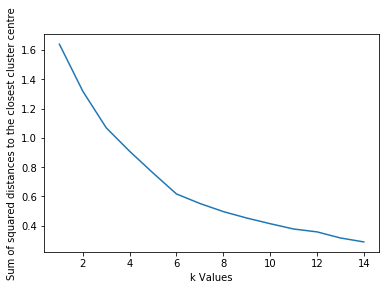

In [26]:
# First we check what best K to use. For this we look at the Sum of squared distances of samples to the closest cluster center:

N_clusters = 15
k_sum_distance=[]
for n in range(1,N_clusters):
    
    London_onehot_grouped_cluster = London_onehot_grouped.drop('London borough',1)

    London_KMeans= KMeans(n_clusters=n,random_state=0)
    London_KMeans.fit(London_onehot_grouped_cluster)
    k_sum_distance.append(London_KMeans.inertia_)
x=range(1,N_clusters)   
plt.plot(x,k_sum_distance)
plt.xlabel('k Values')
plt.ylabel('Sum of squared distances to the closest cluster centre')
plt.show()

# Looking at the plot below, we can see that the elbow point is at k=6

In [27]:
Num_clusters=6
London_onehot_grouped_cluster = London_onehot_grouped.drop('London borough',1)

London_KMeans= KMeans(n_clusters=Num_clusters,random_state=0)
London_KMeans.fit(London_onehot_grouped_cluster)

London_KMeans.labels_[0:10]

array([1, 1, 3, 1, 1, 0, 1, 0, 1, 1])

In [28]:
#Now we will include the top venues:
boroughs_venues_sorted.insert(0, 'Cluster Labels', London_KMeans.labels_)

London_merge = df

London_merge = London_merge.join(boroughs_venues_sorted.set_index('Boroughs'), on='London borough')
London_merge


,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,51.542305,-0.139560,0,Coffee Shop,Italian Restaurant,Ice Cream Shop,Burger Joint,Sandwich Place,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Doner Restaurant,Caribbean Restaurant,French Restaurant
1,Greenwich,51.482084,-0.004542,1,Café,Coffee Shop,Chinese Restaurant,Burger Joint,Pub,Pizza Place,Bakery,French Restaurant,Turkish Restaurant,Japanese Restaurant
2,Hackney,51.543240,-0.049362,1,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Italian Restaurant,Turkish Restaurant,Sandwich Place
3,Hammersmith,51.492038,-0.223640,0,Coffee Shop,Pub,Fast Food Restaurant,Sandwich Place,Burger Joint,Italian Restaurant,Donut Shop,Sushi Restaurant,Breakfast Spot,Burrito Place
4,Islington,51.538429,-0.099905,0,Coffee Shop,Gastropub,Cocktail Bar,Pub,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Pizza Place,Bakery,Café
5,Kensington and Chelsea,51.498995,-0.199123,1,Café,Persian Restaurant,Bakery,Restaurant,Mediterranean Restaurant,Burger Joint,Sandwich Place,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant
6,Lambeth,51.501301,-0.117287,0,Coffee Shop,Restaurant,Sandwich Place,Bar,Mexican Restaurant,Pub,Burger Joint,Fast Food Restaurant,Steakhouse,Sushi Restaurant
7,Lewisham,51.462432,-0.010133,0,Coffee Shop,Café,Restaurant,Bakery,Fish & Chips Shop,Fast Food Restaurant,Dessert Shop,Burger Joint,Wings Joint,Food Truck
8,Southwark,51.502922,-0.103458,0,Coffee Shop,Pub,Restaurant,Sandwich Place,Burger Joint,Asian Restaurant,Ramen Restaurant,Portuguese Restaurant,Café,Fast Food Restaurant
9,Tower Hamlets,51.525629,-0.033585,0,Fast Food Restaurant,Coffee Shop,Pizza Place,Fried Chicken Joint,Café,Diner,Fish & Chips Shop,Burger Joint,Turkish Restaurant,Chinese Restaurant


#### Final Map With Clusters

In [29]:
London_Map_Clusters= folium.Map(location=['51.5074','-0.1278'],zoom_start=11)
# set color scheme for the clusters
x = np.arange(Num_clusters)
ys = [i + x + (i*x)**2 for i in range(Num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merge['Latitude'], London_merge['Longitude'], London_merge['London borough'], London_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(London_Map_Clusters)
       
London_Map_Clusters

In [30]:
London_merge_cluster_0 = London_merge[London_merge['Cluster Labels']==0]
London_merge_cluster_0

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,51.542305,-0.139560,0,Coffee Shop,Italian Restaurant,Ice Cream Shop,Burger Joint,Sandwich Place,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Doner Restaurant,Caribbean Restaurant,French Restaurant
3,Hammersmith,51.492038,-0.223640,0,Coffee Shop,Pub,Fast Food Restaurant,Sandwich Place,Burger Joint,Italian Restaurant,Donut Shop,Sushi Restaurant,Breakfast Spot,Burrito Place
4,Islington,51.538429,-0.099905,0,Coffee Shop,Gastropub,Cocktail Bar,Pub,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Pizza Place,Bakery,Café
6,Lambeth,51.501301,-0.117287,0,Coffee Shop,Restaurant,Sandwich Place,Bar,Mexican Restaurant,Pub,Burger Joint,Fast Food Restaurant,Steakhouse,Sushi Restaurant
7,Lewisham,51.462432,-0.010133,0,Coffee Shop,Café,Restaurant,Bakery,Fish & Chips Shop,Fast Food Restaurant,Dessert Shop,Burger Joint,Wings Joint,Food Truck
8,Southwark,51.502922,-0.103458,0,Coffee Shop,Pub,Restaurant,Sandwich Place,Burger Joint,Asian Restaurant,Ramen Restaurant,Portuguese Restaurant,Café,Fast Food Restaurant
9,Tower Hamlets,51.525629,-0.033585,0,Fast Food Restaurant,Coffee Shop,Pizza Place,Fried Chicken Joint,Café,Diner,Fish & Chips Shop,Burger Joint,Turkish Restaurant,Chinese Restaurant
10,Wandsworth,51.457027,-0.193261,0,Coffee Shop,Pizza Place,Café,Burger Joint,Restaurant,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Asian Restaurant,Bakery
18,Ealing,51.512655,-0.305195,0,Coffee Shop,Burger Joint,Bakery,Pizza Place,Restaurant,Fast Food Restaurant,Portuguese Restaurant,Salad Place,Diner,Ramen Restaurant
22,Havering,51.544369,-0.144303,0,Coffee Shop,Tea Room,Vegetarian / Vegan Restaurant,Ice Cream Shop,Middle Eastern Restaurant,Café,Italian Restaurant,Breakfast Spot,Pub,Portuguese Restaurant


In [31]:
London_merge_cluster_1 = London_merge[London_merge['Cluster Labels']==1]
London_merge_cluster_1

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Greenwich,51.482084,-0.004542,1,Café,Coffee Shop,Chinese Restaurant,Burger Joint,Pub,Pizza Place,Bakery,French Restaurant,Turkish Restaurant,Japanese Restaurant
2,Hackney,51.543240,-0.049362,1,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Italian Restaurant,Turkish Restaurant,Sandwich Place
5,Kensington and Chelsea,51.498995,-0.199123,1,Café,Persian Restaurant,Bakery,Restaurant,Mediterranean Restaurant,Burger Joint,Sandwich Place,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant
11,Westminster,51.501356,-0.124930,1,Café,Coffee Shop,Italian Restaurant,Restaurant,Bakery,Dessert Shop,Turkish Restaurant,Ice Cream Shop,English Restaurant,Tea Room
12,Barking,51.538992,0.080424,1,Café,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,Indian Restaurant,Chinese Restaurant,Caribbean Restaurant,Bakery,Pizza Place,Steakhouse
13,Barnet,51.653090,-0.200226,1,Café,Coffee Shop,Pizza Place,Restaurant,Indian Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant
15,Brent,51.563826,-0.275760,1,Café,Coffee Shop,Chinese Restaurant,Indian Restaurant,Burger Joint,Fast Food Restaurant,Pizza Place,North Indian Restaurant,Middle Eastern Restaurant,Caribbean Restaurant
16,Bromley,51.402805,0.014814,1,Café,Coffee Shop,Fast Food Restaurant,Pizza Place,Burger Joint,Turkish Restaurant,Asian Restaurant,Sandwich Place,Sushi Restaurant,Creperie
17,Croydon,51.371305,-0.101957,1,Fast Food Restaurant,Coffee Shop,Café,Pizza Place,Asian Restaurant,Bakery,Indian Restaurant,Caribbean Restaurant,Fried Chicken Joint,Sandwich Place
19,Enfield,51.652085,-0.081018,1,Coffee Shop,Café,Turkish Restaurant,Bakery,Restaurant,Deli / Bodega,Ice Cream Shop,Indian Restaurant,Burger Joint,Chinese Restaurant


In [32]:
London_merge_cluster_2 = London_merge[London_merge['Cluster Labels']==2]
London_merge_cluster_2

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Hillingdon,51.542519,-0.448335,2,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Grocery Store,Event Space,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant


In [33]:
London_merge_cluster_3 = London_merge[London_merge['Cluster Labels']==3]
London_merge_cluster_3

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Bexley,51.441679,0.150488,3,Deli / Bodega,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Breakfast Spot,Coffee Shop,Chinese Restaurant,Diner,Café,Mexican Restaurant
21,Harrow,51.596769,-0.337275,3,Indian Restaurant,Coffee Shop,Chinese Restaurant,Café,Fast Food Restaurant,Restaurant,Bakery,Pizza Place,Sandwich Place,Burger Joint
24,Hounslow,51.468613,-0.361347,3,Indian Restaurant,Coffee Shop,Chinese Restaurant,Bakery,Turkish Restaurant,Fast Food Restaurant,Café,Burger Joint,Romanian Restaurant,Restaurant
30,Sutton,51.357511,-0.173640,3,Indian Restaurant,Chinese Restaurant,Café,Italian Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Bakery,Food Court,Donut Shop


In [34]:
London_merge_cluster_4 = London_merge[London_merge['Cluster Labels']==4]
London_merge_cluster_4

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Redbridge,51.57632,0.04541,4,Pizza Place,Chinese Restaurant,Café,Diner,Eastern European Restaurant,Event Space,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop


In [35]:
London_merge_cluster_5 = London_merge[London_merge['Cluster Labels']==5]
London_merge_cluster_5

,London borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Richmond upon Thames,51.440354,-0.308151,5,Indian Restaurant,German Restaurant,Café,Fish & Chips Shop,Wings Joint,Event Space,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant


### Analysing London enterprise data

This is the data that shows the rate of birth and death of enterprises within each borough. This will give us a good indication of how well businesses tend to do in each borough.

In [36]:
ent_df = pd.read_csv("C:/Users/Sharif/Desktop/Sharif_downloads/business-demographics.csv")
ent_df.drop('code',axis=1)

,area,year,active_enterprises,births,birth_rate,deaths,death_rate
0,City of London,2004,11980,1175,9.8,1160,9.7
1,Barking and Dagenham,2004,3120,480,15.4,410,13.1
2,Barnet,2004,19655,2435,12.4,3015,15.3
3,Bexley,2004,6450,940,14.6,800,12.4
4,Brent,2004,11295,1800,15.9,1745,15.4
5,Bromley,2004,11655,1590,13.6,1375,11.8
6,Camden,2004,22910,2840,12.4,2775,12.1
7,Croydon,2004,11230,1630,14.5,1580,14.1
8,Ealing,2004,12830,2115,16.5,1780,13.9
9,Enfield,2004,9305,1400,15.0,1200,12.9


In [37]:
# here we create a new dataframe that contains the births of new companies every year, for each borough

columns=ent_df['year'].unique()
ent_new_df = pd.DataFrame(columns=columns) #create our columns of years
ent_new_df['area']=ent_df['area'].unique() #create our column for the boroughs
columns_change=[ent_new_df.columns[-1]] + list(ent_new_df.columns[:-1]) #adjust the dataframe so that boroughs come first
ent_new_df=ent_new_df[columns_change]

#This following function looks through every data point in the dataframe and allocates the value of the data point, to the
#corresponding postion in our new dataframe.
for col in list(ent_new_df.columns[1:]):
    for row in list(ent_new_df['area']):
        test_df=ent_df.loc[ent_df['area']==row]
        new_test_df=test_df[test_df['year']==col]
        test_value = new_test_df['births'].values[0]
        ent_new_df.loc[ent_new_df['area']==row,col]=test_value


ent_new_df

,area,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,City of London,1175,1305,1225,1305,2005,1790,1730,1780,1900,2300,2610,4965,4850,5905,5885
1,Barking and Dagenham,480,500,485,510,720,615,635,835,845,1185,1310,1665,1775,1400,1525
2,Barnet,2435,2425,2150,2305,2610,2410,2440,2835,2995,3730,3985,4460,4455,4350,4335
3,Bexley,940,900,895,870,795,720,840,945,895,1340,1455,1605,1640,1410,1300
4,Brent,1800,1740,1565,1750,1950,1685,1630,1915,1975,2515,2585,2895,3020,2680,3535
5,Bromley,1590,1500,1515,1750,1540,1320,1475,1580,1670,2080,2190,2340,2420,2705,2390
6,Camden,2840,2570,2485,2745,3035,2735,2930,3200,3140,3990,4375,5445,6050,5765,6765
7,Croydon,1630,1525,1580,1595,1575,1400,1495,1755,1765,2305,2390,2695,2905,2470,2495
8,Ealing,2115,1885,1775,2035,2155,1940,1715,2210,2225,3200,3110,3420,3590,3120,2955
9,Enfield,1400,1380,1385,1285,1425,1310,1390,1530,1615,2270,2305,2520,2650,2270,2365


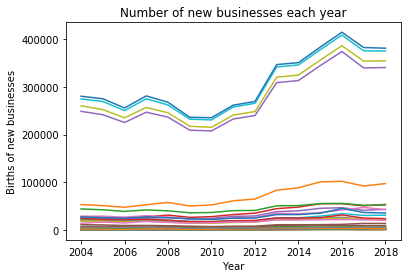

In [38]:
for i in ent_new_df['area']:
    y1 = ent_new_df.loc[ent_new_df['area']==i]
    y1=(y1.loc[:,y1.columns[1:]].values)[0]
    X1=ent_new_df.columns[1:].transpose()

    plt.plot(X1,y1,label=i)
    plt.xlabel('Year')
    plt.ylabel('Births of new businesses')
    plt.title('Number of new businesses each year')
    
plt.show()

In [ ]:
# In the following we only looked at the croydon borough to give us an idea of how well business have done in the past:


0.7169617091726753


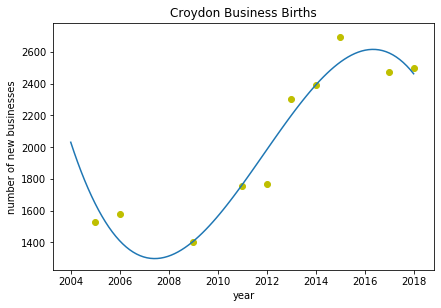

In [340]:
# Sorting through our data and putting it in a form that we can work with.
Y=ent_new_df.loc[ent_new_df['area']=='Croydon']
Y=(Y.loc[:,Y.columns[1:]].values)[0]
X=ent_new_df.columns[1:]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=4)

x_train=np.asanyarray(x_train)
y_train=np.asanyarray(y_train)
x_test=np.asanyarray(x_test)
y_test=np.asanyarray(y_test)

my_degree=3
    #----------------------------------------------------------------------------
#Using polynomialfeatures as well as linear regression in order to model our data
polnomi=PolynomialFeatures(degree=my_degree)
train_x_poly = polnomi.fit_transform(x_train.reshape(-1,1))
test_x_poly = polnomi.fit_transform(x_test.reshape(-1,1))


clf = linear_model.LinearRegression()
clf.fit(train_x_poly,y_train)

    #-----------------------------------------------------------------------------
    #-----------------------------------------------------------------------------
    #-----------------------------------------------------------------------------
y_predict = clf.predict(test_x_poly)

y_resid=y_test-y_predict
sum_y_resid= sum(pow(y_resid,2))
total_y_resid = sum(pow((y_test-(sum(y_test)/len(y_test))),2)) 
rsq = 1-(sum_y_resid/total_y_resid)
R2_value=r2_score(y_test,y_predict)

    #-----------------------------------------------------------------------------
    #-----------------------------------------------------------------------------
    #-----------------------------------------------------------------------------
    #for plotting the graph of our model
xx=np.linspace(2004,2018,100) # using large number of samples
xx2=polnomi.fit_transform(xx.reshape(-1,1)) #transform xx values so that they be used with our model
terms3=clf.predict(xx2) # values of y using our model
    

#Plotting our figure
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax1.set_xlabel('year')
ax1.set_ylabel('number of new businesses')
ax1.set_title('Croydon Business Births')
ax1=plt.plot(xx,terms3[:])
ax1=plt.scatter(x_train,y_train,color='y')

### Results


When we have analysed the data with regards to the new business demographics, it is clear that all of London seems to be upcoming in terms of new businesses and the rate at which new businesses are formed is increasing. The amount of new businesses openning in a year depends also on the borough.
Overall however, I believe it would be a wise decision to start a new business as a cafe somewhere in the region of central london like islington, or slightly north like Barnet.

### Discussion:

Looking at the results that we have found we can see that the largest category of places that sells food around London are cafes however following that, the popularity of a specifc type of place would really depend on the borough that the client is looking to open their own business in. We can use the code here to find where specifically would be an ideal place for him to open depending on what kind of restaurant he is looking at.

When we have analysed the data with regards to the new business demographics, it is clear that all of London seems to be upcoming in terms of new businesses and the rate at which new businesses are formed is increasing. The amount of new businesses openning in a year depends also on the borough.

### Conclusion:

In conclusion I believe that there is alot more to look into in terms of demographics for a particular area. It would be beneficial to expand on our results to only include the rate of births and deaths of businesses in the food sector. This would give us an idea whether a specific borough are more acceptable of new businesses and how easy it would be to start.
